In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
#plt.rcParams["figure.figsize"] = (10,6)

from labellines import labelLines
import pandas as pd


In [3]:
from io import StringIO

data_str = """B	Hmax	Nodos	Elementos	maxelem	minelem	maxu	maxtau	Torque	ErrorL2u	ErrorL2tau	ErrorL2Torque
1	0.01	9590	18821	0.01	0.005	2.5000	4.9875	7.8536	4.19E-06	4.04E-04	4.98E-05
1	0.03	1080	2040	0.03	0.015	2.5002	4.9567	7.8504	4.80E-05	1.06E-03	4.56E-04
1	0.06	288	514	0.06	0.03	2.5015	4.9402	7.8396	2.37E-04	2.44E-03	1.83E-03
1	0.1	112	186	0.1	0.05	2.5019	4.8656	7.8152	7.45E-04	4.48E-03	4.94E-03
1	0.2	32	44	0.2	0.1	2.5114	4.7143	7.6932	4.48E-03	1.30E-02	2.05E-02
1.5	0.01	14232	28014	0.01	0.005	3.4616	6.8987	16.3115	2.77E-06	8.87E-04	3.63E-05
1.5	0.03	1621	3091	0.03	0.015	3.4617	6.8610	16.3067	3.01E-05	2.71E-03	3.29E-04
1.5	0.06	429	781	0.06	0.03	3.4631	6.7874	16.2907	1.62E-04	5.56E-03	1.31E-03
1.5	0.1	163	279	0.1	0.05	3.4632	6.6874	16.2523	5.19E-04	9.42E-03	3.67E-03
1.5	0.2	46	67	0.2	0.1	3.4775	6.4237	16.0657	3.21E-03	2.12E-02	1.51E-02
2	0.01	18724	36904	0.01	0.005	4.0000	7.9700	25.1319	2.27E-06	1.36E-03	3.17E-05
2	0.03	2153	4123	0.03	0.015	4.0002	7.9221	25.1256	2.30E-05	4.24E-03	2.86E-04
2	0.06	551	1010	0.06	0.03	4.0014	7.8133	25.1034	1.38E-04	8.35E-03	1.17E-03
2	0.1	211	366	0.1	0.05	4.0014	7.7319	25.0502	4.24E-04	1.46E-02	3.29E-03
2	0.2	59	89	0.2	0.1	4.0033	7.4693	24.8011	2.18E-03	2.89E-02	1.32E-02
2.5	0.01	23124	45609	0.01	0.005	4.3104	8.5877	33.8524	2.11E-06	1.68E-03	2.98E-05
2.5	0.03	2661	5108	0.03	0.015	4.3105	8.5334	33.8444	1.99E-05	5.17E-03	2.66E-04
2.5	0.06	696	1283	0.06	0.03	4.3118	8.4175	33.8172	1.10E-04	1.04E-02	1.07E-03
2.5	0.1	262	458	0.1	0.05	4.3118	8.3293	33.7512	3.65E-04	1.79E-02	3.02E-03
2.5	0.2	74	114	0.2	0.1	4.3257	7.9979	33.4399	2.39E-03	3.40E-02	1.22E-02
"""

df = pd.read_csv(StringIO(data_str), delim_whitespace=True)

df


,B,Hmax,Nodos,Elementos,maxelem,minelem,maxu,maxtau,Torque,ErrorL2u,ErrorL2tau,ErrorL2Torque
0,1.0,0.01,9590,18821,0.01,0.005,2.5000,4.9875,7.8536,0.000004,0.000404,0.000050
1,1.0,0.03,1080,2040,0.03,0.015,2.5002,4.9567,7.8504,0.000048,0.001060,0.000456
2,1.0,0.06,288,514,0.06,0.030,2.5015,4.9402,7.8396,0.000237,0.002440,0.001830
3,1.0,0.10,112,186,0.10,0.050,2.5019,4.8656,7.8152,0.000745,0.004480,0.004940
4,1.0,0.20,32,44,0.20,0.100,2.5114,4.7143,7.6932,0.004480,0.013000,0.020500
5,1.5,0.01,14232,28014,0.01,0.005,3.4616,6.8987,16.3115,0.000003,0.000887,0.000036
6,1.5,0.03,1621,3091,0.03,0.015,3.4617,6.8610,16.3067,0.000030,0.002710,0.000329
7,1.5,0.06,429,781,0.06,0.030,3.4631,6.7874,16.2907,0.000162,0.005560,0.001310
8,1.5,0.10,163,279,0.10,0.050,3.4632,6.6874,16.2523,0.000519,0.009420,0.003670
9,1.5,0.20,46,67,0.20,0.100,3.4775,6.4237,16.0657,0.003210,0.021200,0.015100


In [9]:
d_b1 = df[df['B']==1]
d_b15 = df[df['B']==1.5]
d_b2 = df[df['B']==2]
d_b25 = df[df['B']==2.5]

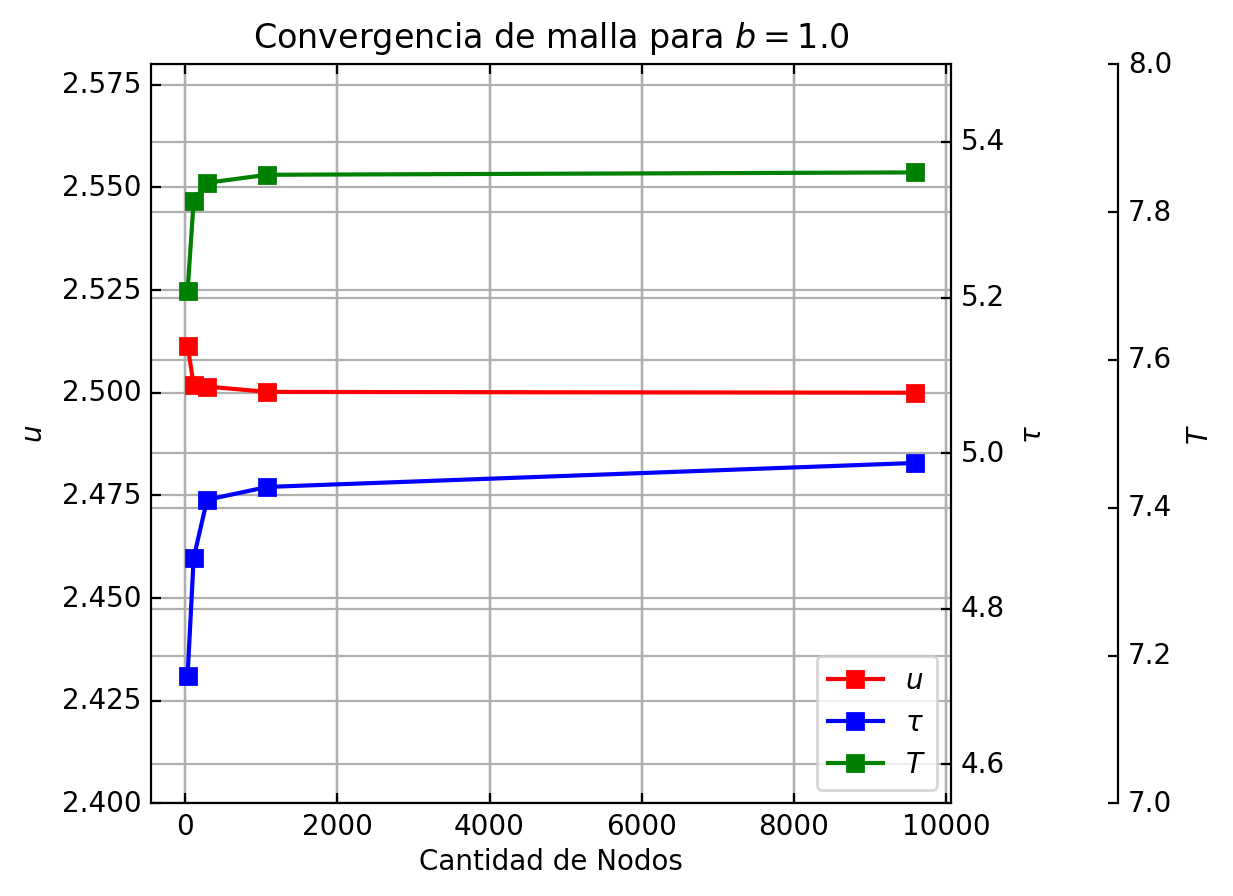

In [59]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par1.grid(zorder=1)
par2.grid(zorder=1)


par1.axis["right"].toggle(all=True)
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel('Cantidad de Nodos')
host.set_ylabel(r"$u$")
par1.set_ylabel(r"$\tau$")
par2.set_ylabel(r"$T$")


p1, = host.plot(d_b1['Nodos'], d_b1['maxu'], c='r', marker='s' , label=r'$u$')
p2, = par1.plot(d_b1['Nodos'], d_b1['maxtau'], c='b', marker='s', label=r'$\tau$')
p3, = par2.plot(d_b1['Nodos'], d_b1['Torque'], c='g', marker='s', label=r'$T$')

host.set_ylim(2.4,2.58)
par1.set_ylim(4.55, 5.5)
par2.set_ylim(7, 8)


plt.legend(loc='lower right')

plt.draw()
plt.grid()

plt.title(r"Convergencia de malla para $b=1.0$")

plt.show()

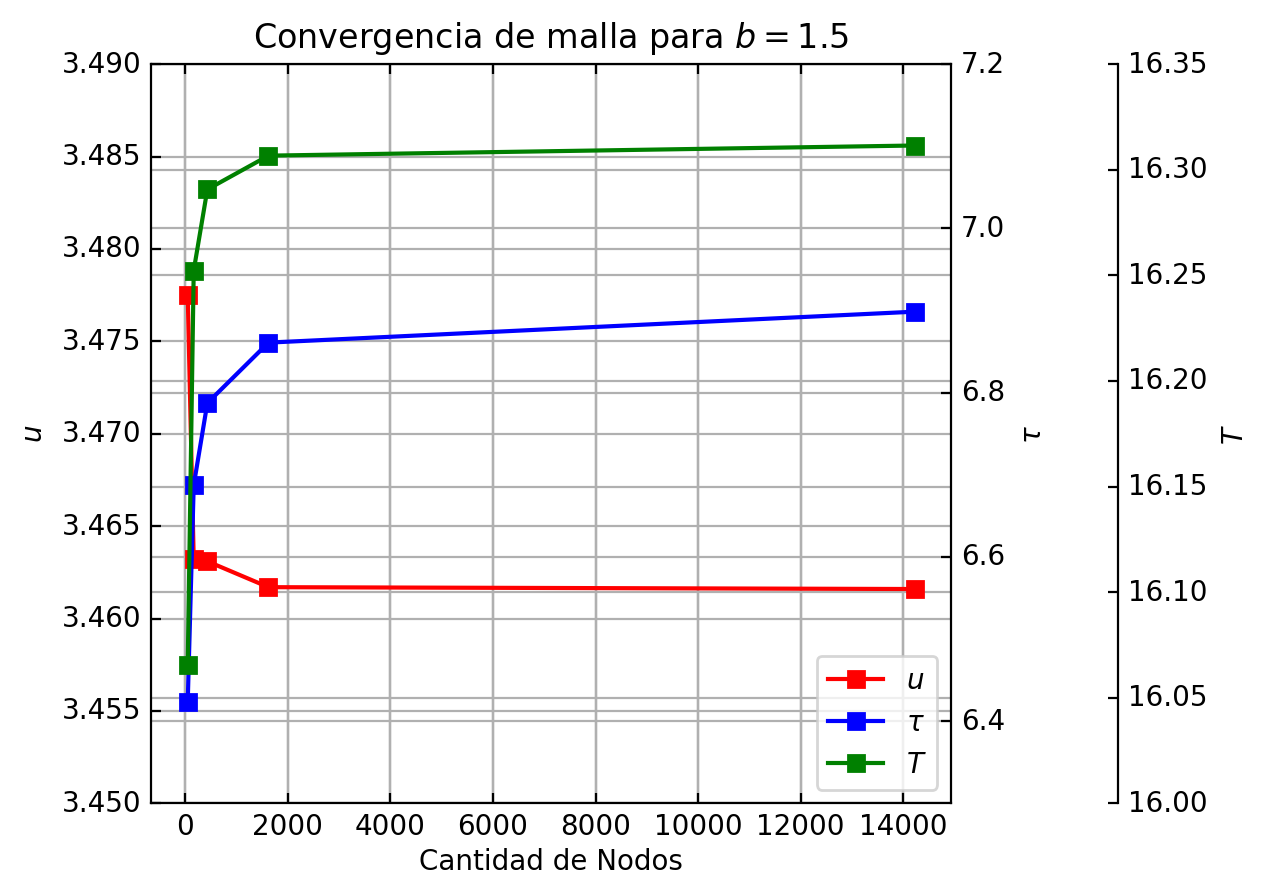

In [60]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par1.grid(zorder=1)
par2.grid(zorder=1)


par1.axis["right"].toggle(all=True)
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel('Cantidad de Nodos')
host.set_ylabel(r"$u$")
par1.set_ylabel(r"$\tau$")
par2.set_ylabel(r"$T$")


p1, = host.plot(d_b15['Nodos'], d_b15['maxu'], c='r', marker='s' , label=r'$u$')
p2, = par1.plot(d_b15['Nodos'], d_b15['maxtau'], c='b', marker='s', label=r'$\tau$')
p3, = par2.plot(d_b15['Nodos'], d_b15['Torque'], c='g', marker='s', label=r'$T$')

host.set_ylim(3.45,3.49)
par1.set_ylim(6.3, 7.2)
par2.set_ylim(16, 16.35)


plt.legend(loc='lower right')

plt.draw()
plt.grid()

plt.title(r"Convergencia de malla para $b=1.5$")

plt.show()

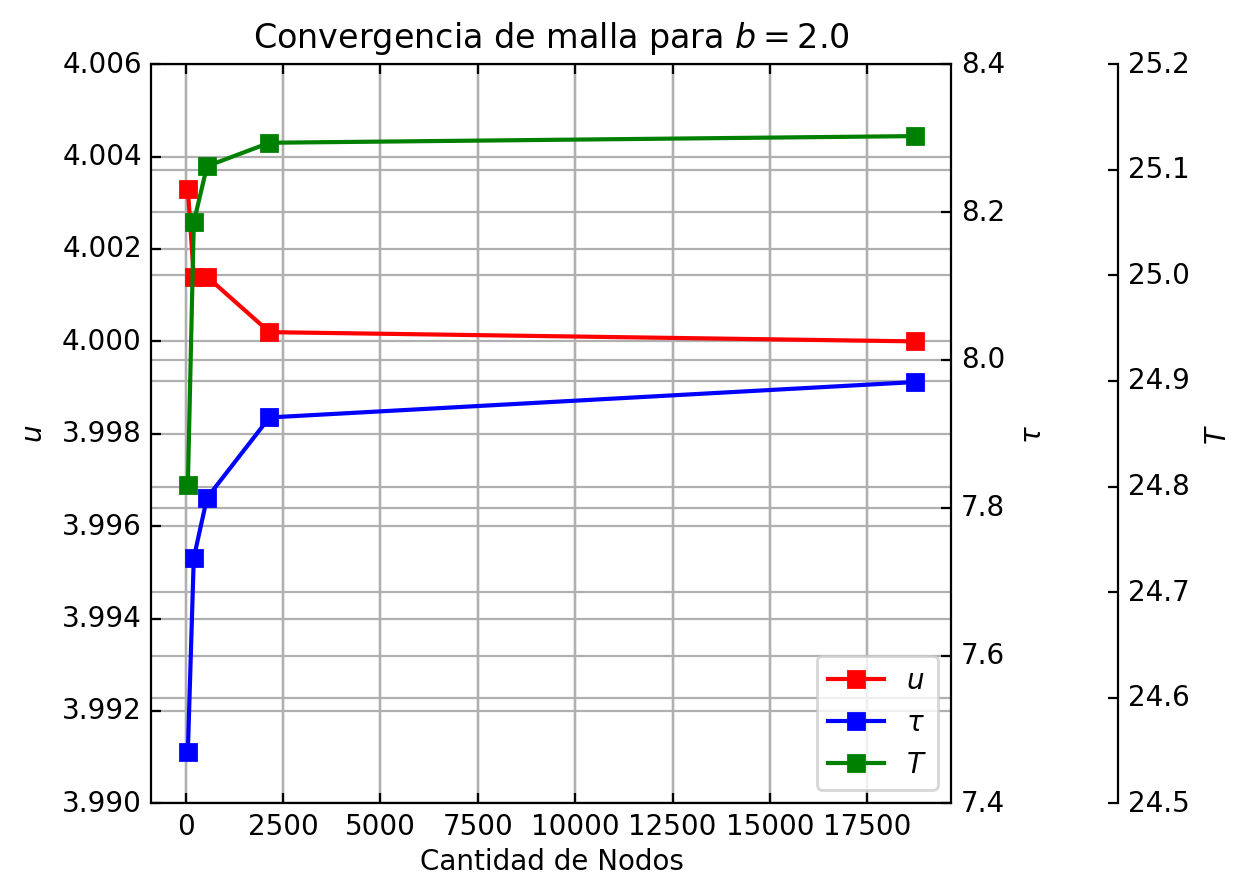

In [67]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par1.grid(zorder=1)
par2.grid(zorder=1)


par1.axis["right"].toggle(all=True)
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel('Cantidad de Nodos')
host.set_ylabel(r"$u$")
par1.set_ylabel(r"$\tau$")
par2.set_ylabel(r"$T$")


p1, = host.plot(d_b2['Nodos'], d_b2['maxu'], c='r', marker='s' , label=r'$u$')
p2, = par1.plot(d_b2['Nodos'], d_b2['maxtau'], c='b', marker='s', label=r'$\tau$')
p3, = par2.plot(d_b2['Nodos'], d_b2['Torque'], c='g', marker='s', label=r'$T$')

host.set_ylim(3.99,4.006)
par1.set_ylim(7.4, 8.4)
par2.set_ylim(24.5, 25.2)


plt.legend(loc='lower right')

plt.draw()
plt.grid()

plt.title(r"Convergencia de malla para $b=2.0$")

plt.show()

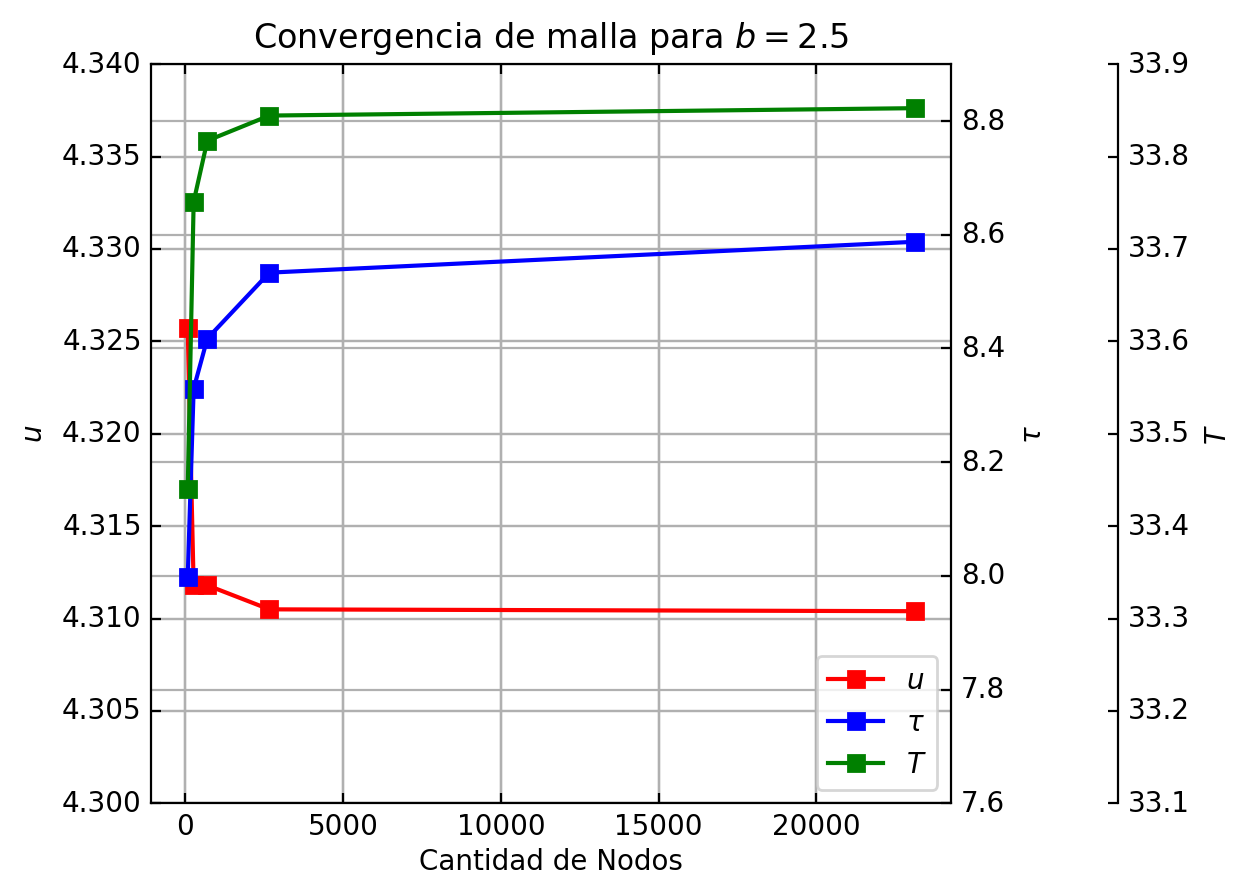

In [70]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par1.grid(zorder=1)
par2.grid(zorder=1)


par1.axis["right"].toggle(all=True)
offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)


host.set_xlabel('Cantidad de Nodos')
host.set_ylabel(r"$u$")
par1.set_ylabel(r"$\tau$")
par2.set_ylabel(r"$T$")


p1, = host.plot(d_b25['Nodos'], d_b25['maxu'], c='r', marker='s' , label=r'$u$')
p2, = par1.plot(d_b25['Nodos'], d_b25['maxtau'], c='b', marker='s', label=r'$\tau$')
p3, = par2.plot(d_b25['Nodos'], d_b25['Torque'], c='g', marker='s', label=r'$T$')

host.set_ylim(4.3,4.34)
par1.set_ylim(7.6, 8.9)
par2.set_ylim(33.1, 33.9)


plt.legend(loc='lower right')

plt.draw()
plt.grid()

plt.title(r"Convergencia de malla para $b=2.5$")

plt.show()

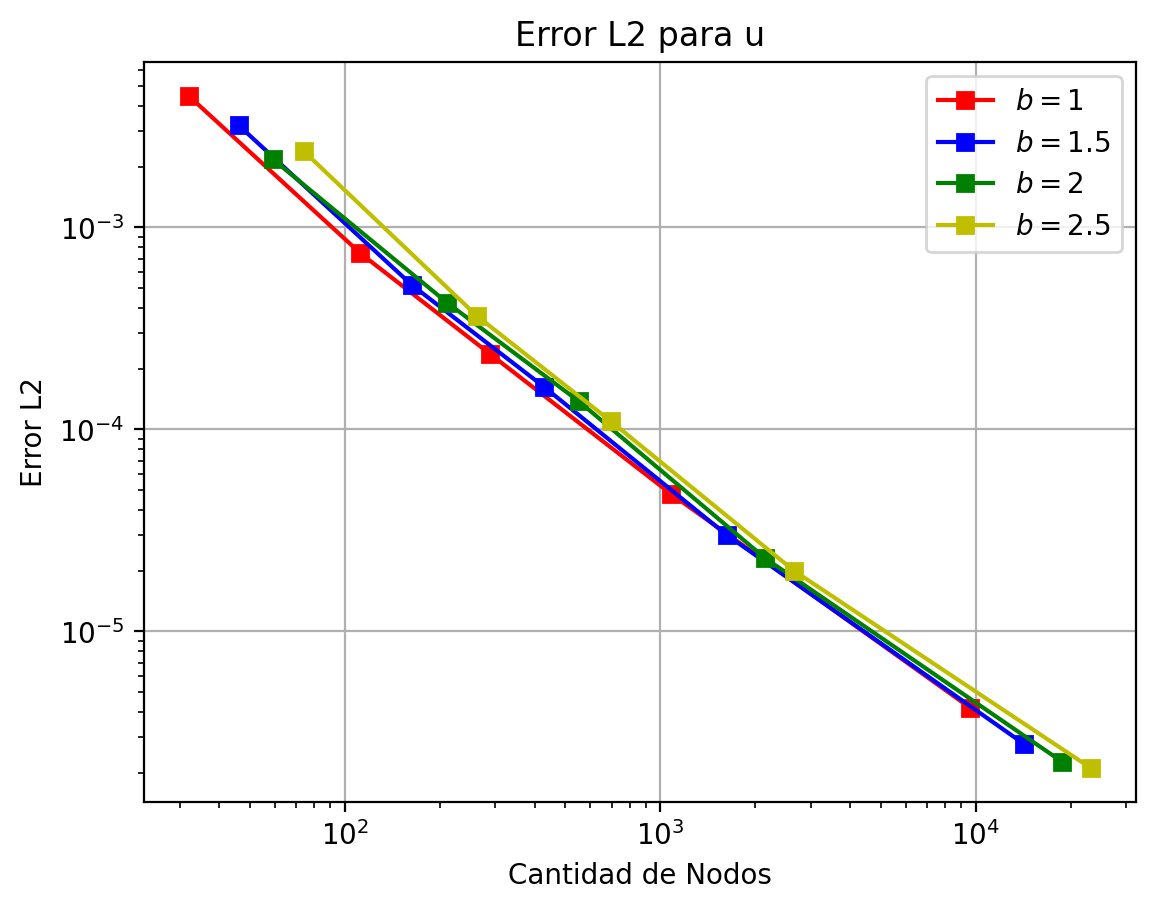

In [72]:
plt.plot(d_b1['Nodos'], d_b1['ErrorL2u'], c='r', ls='-', marker='s', label=r"$b=1$")
plt.plot(d_b15['Nodos'], d_b15['ErrorL2u'], c='b', ls='-', marker='s', label=r"$b=1.5$")
plt.plot(d_b2['Nodos'], d_b2['ErrorL2u'], c='g', ls='-', marker='s', label=r"$b=2$")
plt.plot(d_b25['Nodos'], d_b25['ErrorL2u'], c='y', ls='-', marker='s', label=r"$b=2.5$")

plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Cantidad de Nodos')
plt.ylabel('Error L2')
plt.title("Error L2 para u")

plt.legend(loc='best');

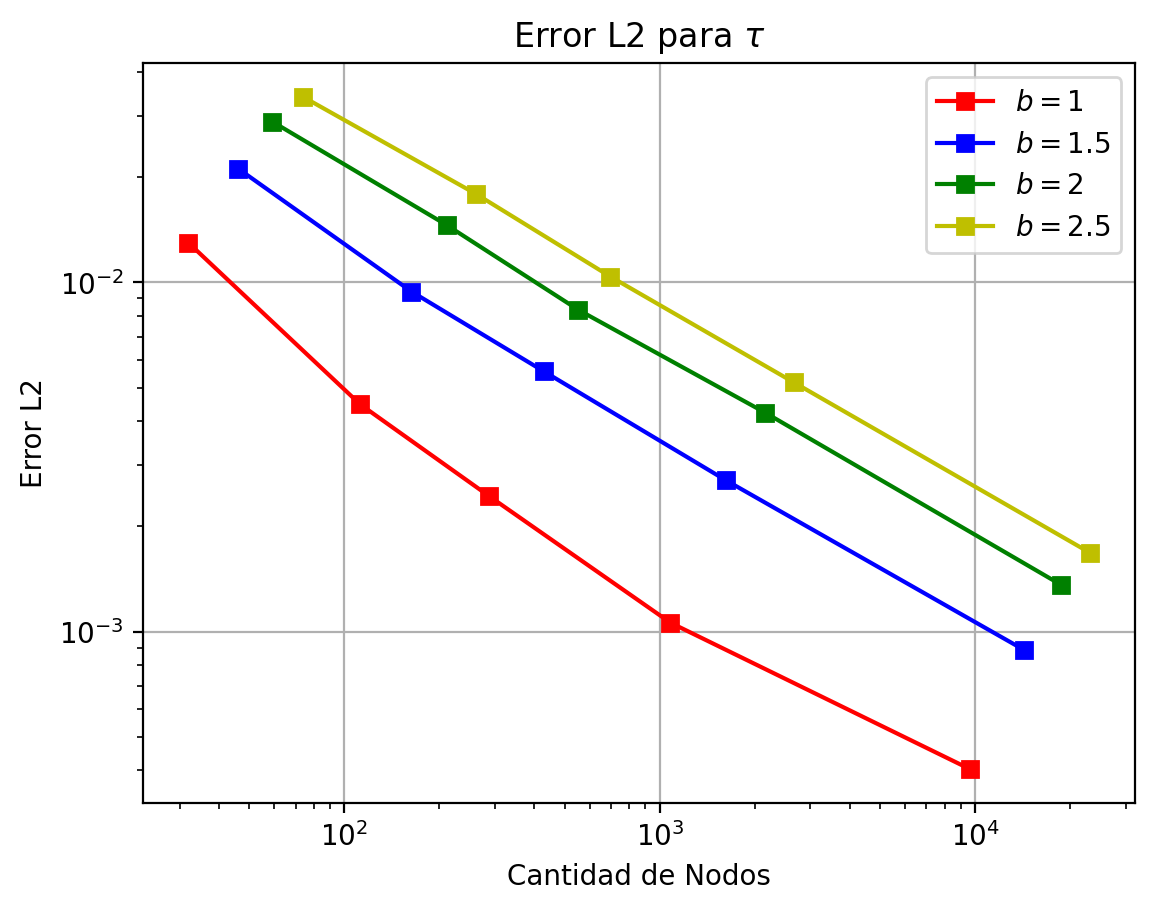

In [73]:
plt.plot(d_b1['Nodos'], d_b1['ErrorL2tau'], c='r', ls='-', marker='s', label=r"$b=1$")
plt.plot(d_b15['Nodos'], d_b15['ErrorL2tau'], c='b', ls='-', marker='s', label=r"$b=1.5$")
plt.plot(d_b2['Nodos'], d_b2['ErrorL2tau'], c='g', ls='-', marker='s', label=r"$b=2$")
plt.plot(d_b25['Nodos'], d_b25['ErrorL2tau'], c='y', ls='-', marker='s', label=r"$b=2.5$")

plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Cantidad de Nodos')
plt.ylabel('Error L2')
plt.title(r"Error L2 para $\tau$")

plt.legend(loc='best');

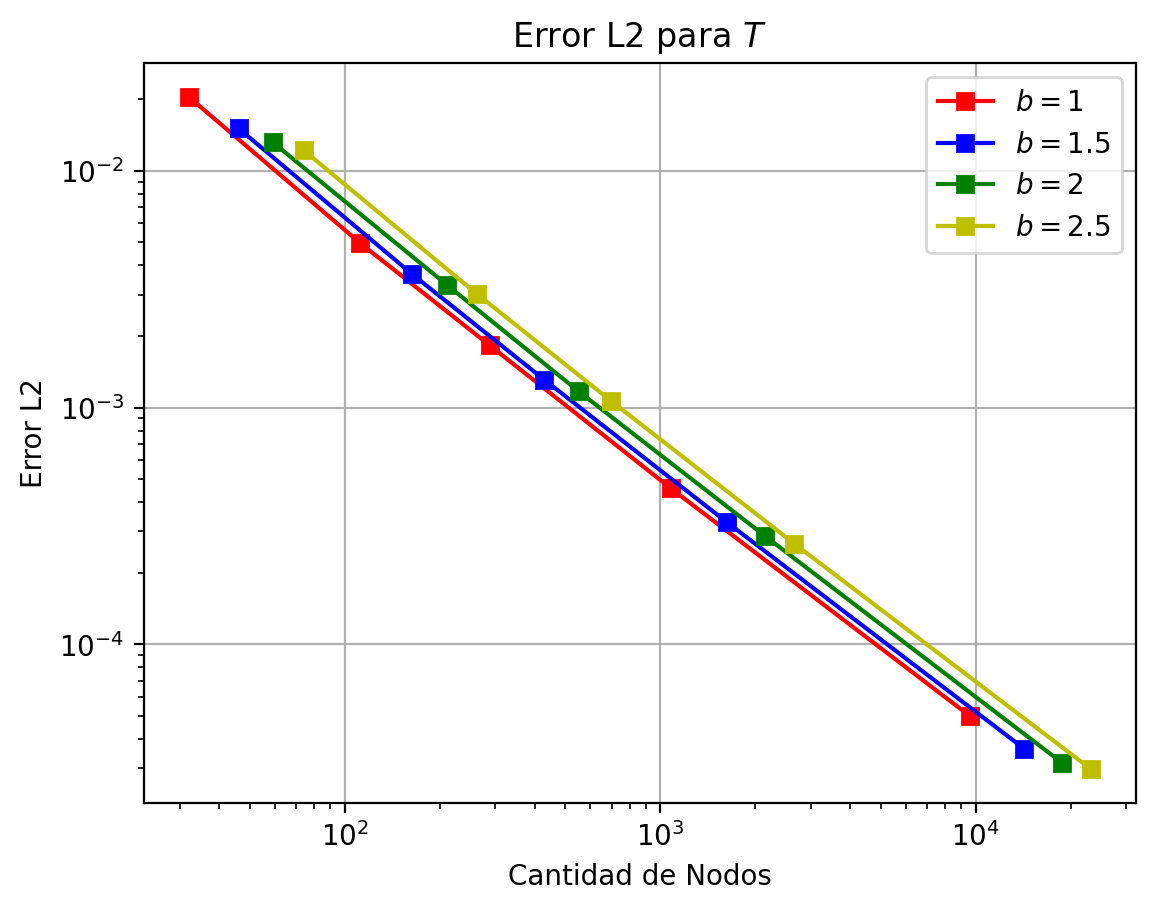

In [74]:
plt.plot(d_b1['Nodos'], d_b1['ErrorL2Torque'], c='r', ls='-', marker='s', label=r"$b=1$")
plt.plot(d_b15['Nodos'], d_b15['ErrorL2Torque'], c='b', ls='-', marker='s', label=r"$b=1.5$")
plt.plot(d_b2['Nodos'], d_b2['ErrorL2Torque'], c='g', ls='-', marker='s', label=r"$b=2$")
plt.plot(d_b25['Nodos'], d_b25['ErrorL2Torque'], c='y', ls='-', marker='s', label=r"$b=2.5$")

plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.xlabel('Cantidad de Nodos')
plt.ylabel('Error L2')
plt.title(r"Error L2 para $T$")

plt.legend(loc='best');